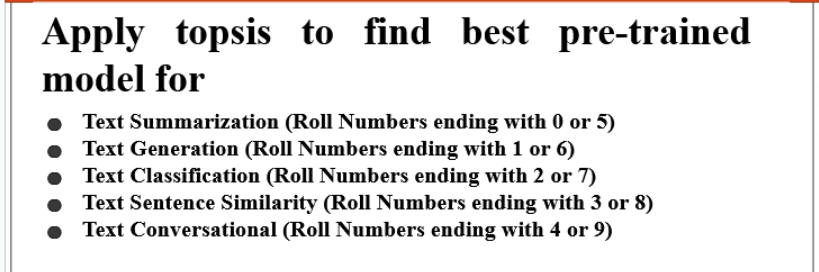

        Model  Accuracy  F1_score  Inference_Time_ms  Model_Size_MB  \
2  DistilBERT      0.90      0.89                 80            250   
4      ALBERT      0.91      0.90                100            300   
0        BERT      0.92      0.91                120            420   
1     RoBERTa      0.94      0.93                150            500   
3       XLNet      0.93      0.92                200            600   

   TOPSIS Score  Rank  
2      0.898589   1.0  
4      0.820399   2.0  
0      0.636230   3.0  
1      0.404231   4.0  
3      0.078008   5.0  


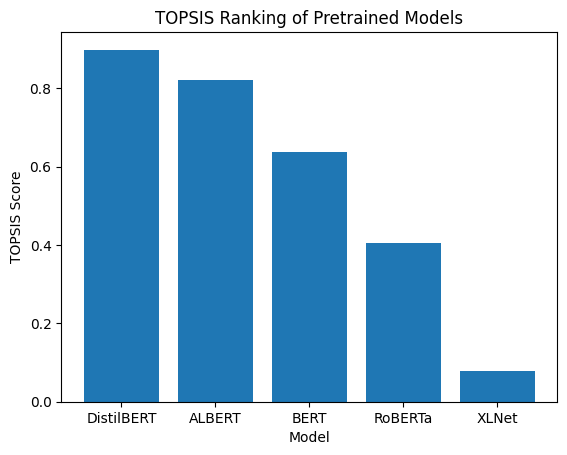

Graph saved as topsis_ranking.png


In [3]:
# TOPSIS implementation with graph saving as PNG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Dataset
data = {
    "Model": ["BERT", "RoBERTa", "DistilBERT", "XLNet", "ALBERT"],
    "Accuracy": [0.92, 0.94, 0.90, 0.93, 0.91],
    "F1_score": [0.91, 0.93, 0.89, 0.92, 0.90],
    "Inference_Time_ms": [120, 150, 80, 200, 100],
    "Model_Size_MB": [420, 500, 250, 600, 300]
}

df = pd.DataFrame(data)

# Step 2: Weights and impacts
weights = np.array([0.4, 0.3, 0.2, 0.1])
impacts = np.array([1, 1, -1, -1])

# Step 3: Decision matrix
matrix = df.iloc[:, 1:].values.astype(float)

# Step 4: Normalize matrix
norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))

# Step 5: Weighted normalized matrix
weighted_matrix = norm_matrix * weights

# Step 6: Ideal best and worst
ideal_best = np.zeros(weighted_matrix.shape[1])
ideal_worst = np.zeros(weighted_matrix.shape[1])

for j in range(weighted_matrix.shape[1]):
    if impacts[j] == 1:
        ideal_best[j] = np.max(weighted_matrix[:, j])
        ideal_worst[j] = np.min(weighted_matrix[:, j])
    else:
        ideal_best[j] = np.min(weighted_matrix[:, j])
        ideal_worst[j] = np.max(weighted_matrix[:, j])

# Step 7: Distance calculation
dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

# Step 8: TOPSIS score
topsis_score = dist_worst / (dist_best + dist_worst)

df["TOPSIS Score"] = topsis_score

# Step 9: Ranking
df["Rank"] = df["TOPSIS Score"].rank(method="max", ascending=False)

# Sort results
df = df.sort_values("Rank")

print(df)

# Step 10: Save results to Excel
df.to_excel("topsis_text_classification_results.xlsx", index=False)

# Step 11: Plot graph
plt.figure()
plt.bar(df["Model"], df["TOPSIS Score"])
plt.title("TOPSIS Ranking of Pretrained Models")
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")

# Step 12: Save graph as PNG
plt.savefig("topsis_ranking.png", dpi=300, bbox_inches="tight")

# Step 13: Show graph
plt.show()

print("Graph saved as topsis_ranking.png")